# Learning Analytics - Group Assignment
## Dataset: Employee Attrition

## Submitted by:
- Aravella Lousta (AEM: 121)
- Michalis Gkotsis (AEM: )

### Import Libraries

In [132]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from category_encoders import MEstimateEncoder, TargetEncoder
from scipy.stats import shapiro, kruskal
from scipy.stats import chi2_contingency
from IPython.display import display
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, make_scorer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

### Import Dataframe

In [12]:
df = pd.read_csv("HR_Analytics.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Overview & Missing Values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [19]:
df.agg(['min', 'max'])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
min,18,No,Non-Travel,102,Human Resources,1,1,Human Resources,1,1,...,1,80,0,0,0,1,0,0,0,0
max,60,Yes,Travel_Rarely,1499,Sales,29,5,Technical Degree,1,2068,...,4,80,3,40,6,4,40,18,15,17


### Dropping Nonessential Columns 

In [22]:
df.drop(["EmployeeNumber", "Over18", "EmployeeCount", "StandardHours"], axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### New Features

In [25]:
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

df["OverTime"] = df["OverTime"].map({"Yes": 1, "No": 0})
df["AverageTenure"] = df[["YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager"]].mean(axis=1)

# 1. Experience Start Age: When did the employee likely begin working?
df['ExperienceStartAge'] = df['Age'] - df['TotalWorkingYears']

# 2. Company Loyalty Index: Average tenure per company.
df['CompanyLoyaltyIndex'] = df['TotalWorkingYears'] / (df['NumCompaniesWorked'] + 1)

# 3. Promotion Delay Ratio: How long relative to tenure since the last promotion.
df['PromotionDelayRatio'] = df['YearsSinceLastPromotion'] / (df['AverageTenure'] + 1e-5)

# 4. Salary-Experience Ratio: Salary relative to total working years.
df['SalaryExperienceRatio'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)

# 5. Training Investment Ratio: Training sessions attended relative to experience.
df['TrainingInvestmentRatio'] = df['TrainingTimesLastYear'] / (df['TotalWorkingYears'] + 1)

# Optionally, drop the intermediate scaled columns
df.drop(['TotalWorkingYears', 'TrainingTimesLastYear', 'MonthlyIncome', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'Age'], axis=1, inplace=True)
df.drop(["YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager"], axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobLevel                  1470 non-null   int64  
 12  JobRole                   1470 non-null   object 
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

### Dataframe Encoding

In [28]:
df_label_encoding = df.copy()

# List of categorical features to be encoded using Label Encoding
cat_le = ['Attrition', 'Gender', 'MaritalStatus', 'OverTime']

for feature in cat_le:
    label_encoder = LabelEncoder()
    
    df_label_encoding[feature] = label_encoder.fit_transform(df_label_encoding[feature])

    print(f"\n{feature}:")
    print(f"\tClasses  : {list(label_encoder.classes_)}")
    print(f"\tEncoding : {label_encoder.transform(label_encoder.classes_)}")


Attrition:
	Classes  : [0, 1]
	Encoding : [0 1]

Gender:
	Classes  : ['Female', 'Male']
	Encoding : [0 1]

MaritalStatus:
	Classes  : ['Divorced', 'Married', 'Single']
	Encoding : [0 1 2]

OverTime:
	Classes  : [0, 1]
	Encoding : [0 1]


In [30]:
mestimate_encoder = MEstimateEncoder(cols=['Department', 'JobRole', 'BusinessTravel', 'EducationField'], random_state=42)
df_label_encoding = mestimate_encoder.fit_transform(df_label_encoding, y=df_label_encoding['Attrition'])
df_label_encoding.head()[['Department', 'JobRole', 'BusinessTravel', 'EducationField']]

,Department,JobRole,BusinessTravel,EducationField
0,0.206177,0.174805,0.149580,0.146888
1,0.138421,0.160960,0.248781,0.146888
2,0.138421,0.239082,0.149580,0.134473
3,0.138421,0.160960,0.248781,0.146888
4,0.138421,0.239082,0.149580,0.135831


In [32]:
df_encoded = df_label_encoding.copy()

### Descriptive Statistics & Plots

In [35]:
df.describe().loc[['mean','std', 'min', 'max']]

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,AverageTenure,ExperienceStartAge,CompanyLoyaltyIndex,PromotionDelayRatio,SalaryExperienceRatio,TrainingInvestmentRatio
mean,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,14313.103401,...,3.153741,2.712245,0.793878,2.761224,5.120181,25.644218,4.193478,0.385492,587.575385,0.378385
std,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,7117.786044,...,0.360824,1.081209,0.852077,0.706476,4.071286,6.875481,4.035504,0.477746,284.650784,0.474865
min,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,...,3.000000,1.000000,0.000000,1.000000,0.000000,18.000000,0.000000,0.000000,95.285714,0.000000
max,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,...,4.000000,4.000000,3.000000,4.000000,20.000000,56.000000,38.000000,2.999955,1904.000000,6.000000


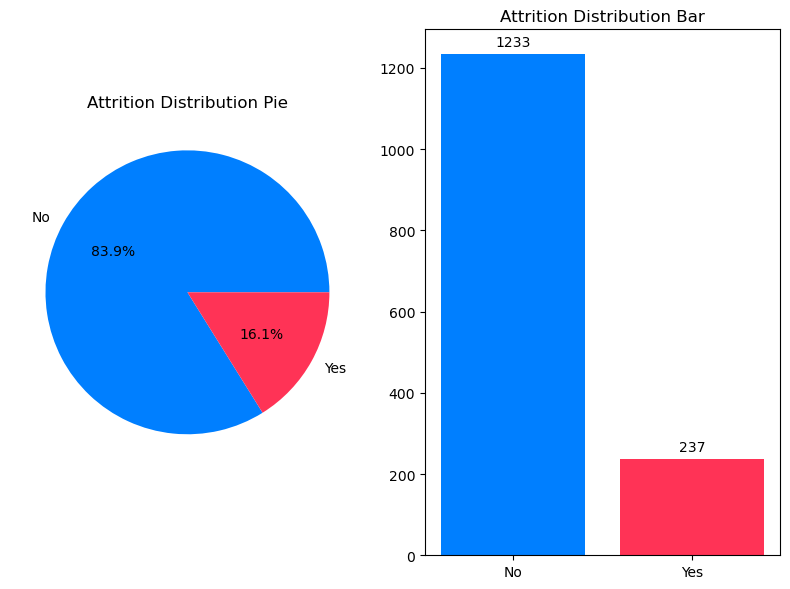

In [161]:
attrition_counts = df['Attrition'].value_counts()
labels = ['No', 'Yes'] 
colors = ['#007FFF', '#FF3356']

fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].pie(attrition_counts, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Attrition Distribution Pie')

axs[1].bar(labels, attrition_counts, label=labels, color=colors)
axs[1].set_title('Attrition Distribution Bar')
for i, count in enumerate(attrition_counts):
    axs[1].text(i, count + 20, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

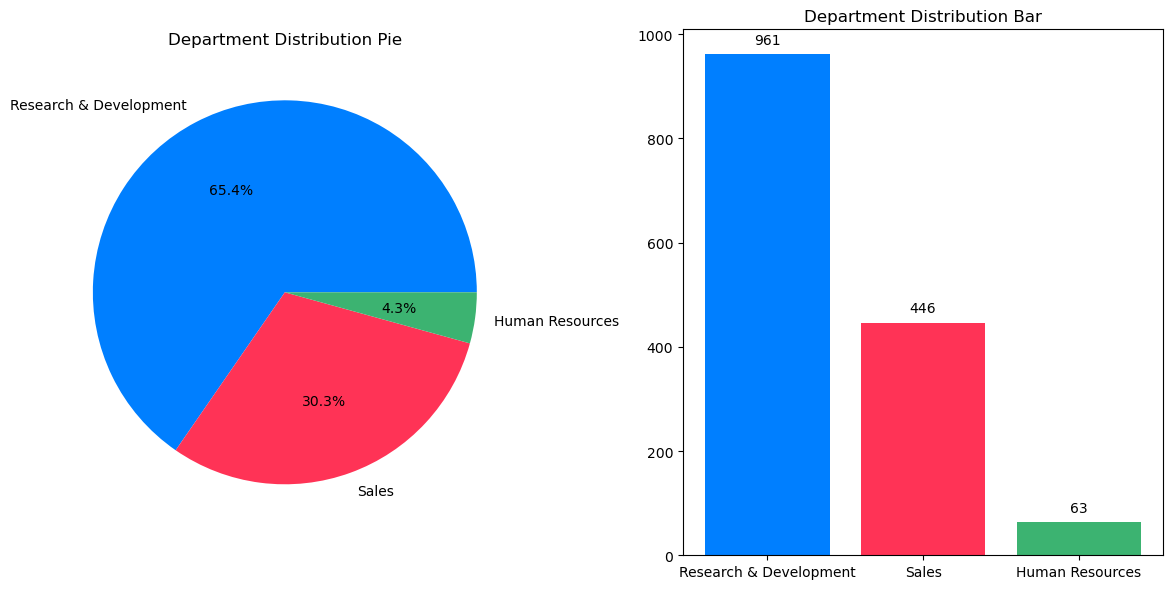

In [163]:
department_counts = df['Department'].value_counts()
labels = ['Research & Development', 'Sales', 'Human Resources']

colors_triple = ['#007FFF', '#FF3356', '#3CB371']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(department_counts, labels=labels, autopct='%1.1f%%', colors=colors_triple)
axs[0].set_title('Department Distribution Pie')

axs[1].bar(labels, department_counts, label=labels, color=colors_triple)
axs[1].set_title('Department Distribution Bar')
for i, count in enumerate(department_counts):
    axs[1].text(i, count + 20, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

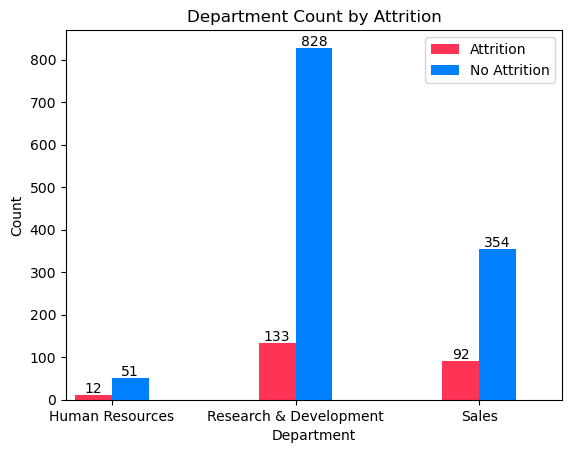

In [40]:
department_counts = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
bar_width = 0.20
index = np.arange(len(department_counts))

department_counts[1].plot(kind='bar', width=bar_width, position=1, color='#FF3356', label='Attrition', align='center')
department_counts[0].plot(kind='bar', width=bar_width, position=0, color='#007FFF', label='No Attrition', align='center')

plt.title('Department Count by Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(index, department_counts.index, rotation=0)
plt.legend()

for i, (attrition_yes, attrition_no) in enumerate(zip(department_counts[1], department_counts[0])):
    plt.text(i - bar_width/2, attrition_yes + 5, str(attrition_yes), ha='center', fontsize=10)
    plt.text(i + bar_width/2, attrition_no + 5, str(attrition_no), ha='center', fontsize=10)

plt.show()

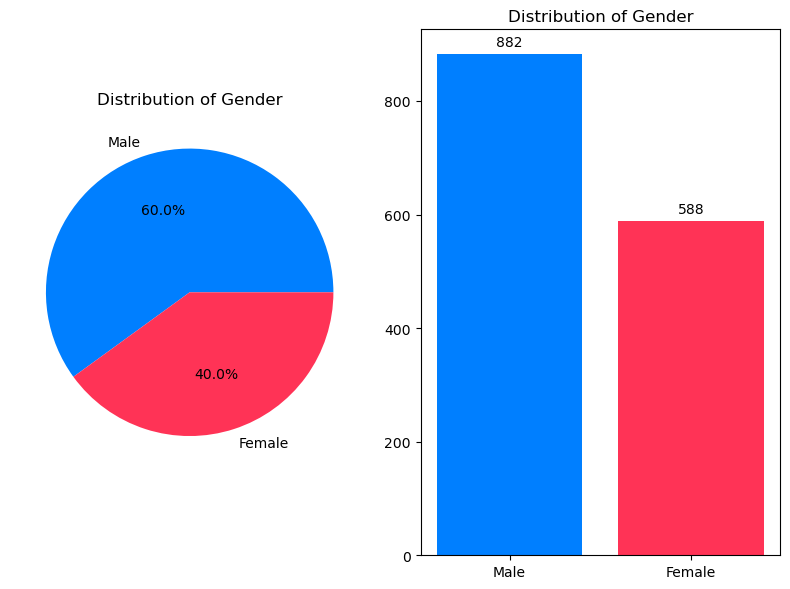

In [165]:
gender_counts = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Distribution of Gender')

axs[1].bar(labels, gender_counts, label=labels, color=colors)
axs[1].set_title('Distribution of Gender')
for i, count in enumerate(gender_counts):
    axs[1].text(i, count + 15, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


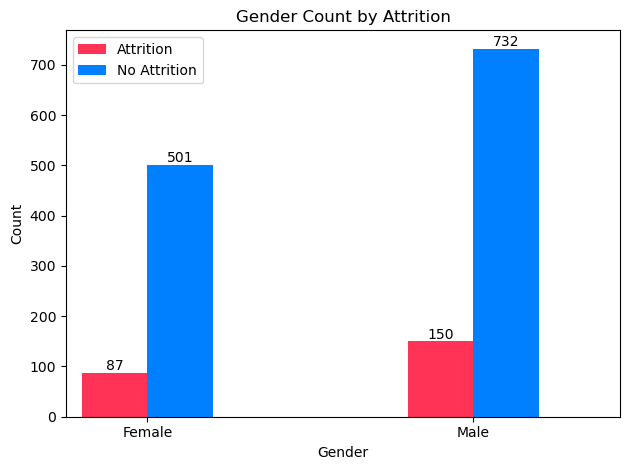

In [45]:
gender_counts = df.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
bar_width = 0.2
index = np.arange(len(gender_counts))

gender_counts[1].plot(kind='bar', width=bar_width, position=1, color='#FF3356', label='Attrition', align='center')
gender_counts[0].plot(kind='bar', width=bar_width, position=0, color='#007FFF', label='No Attrition', align='center')

plt.title('Gender Count by Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(index, gender_counts.index, rotation=0)
plt.legend()

for i, (attrition_yes, attrition_no) in enumerate(zip(gender_counts[1], gender_counts[0])):
    plt.text(i - bar_width/2, attrition_yes + 5, str(attrition_yes), ha='center', fontsize=10)
    plt.text(i + bar_width/2, attrition_no + 5, str(attrition_no), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

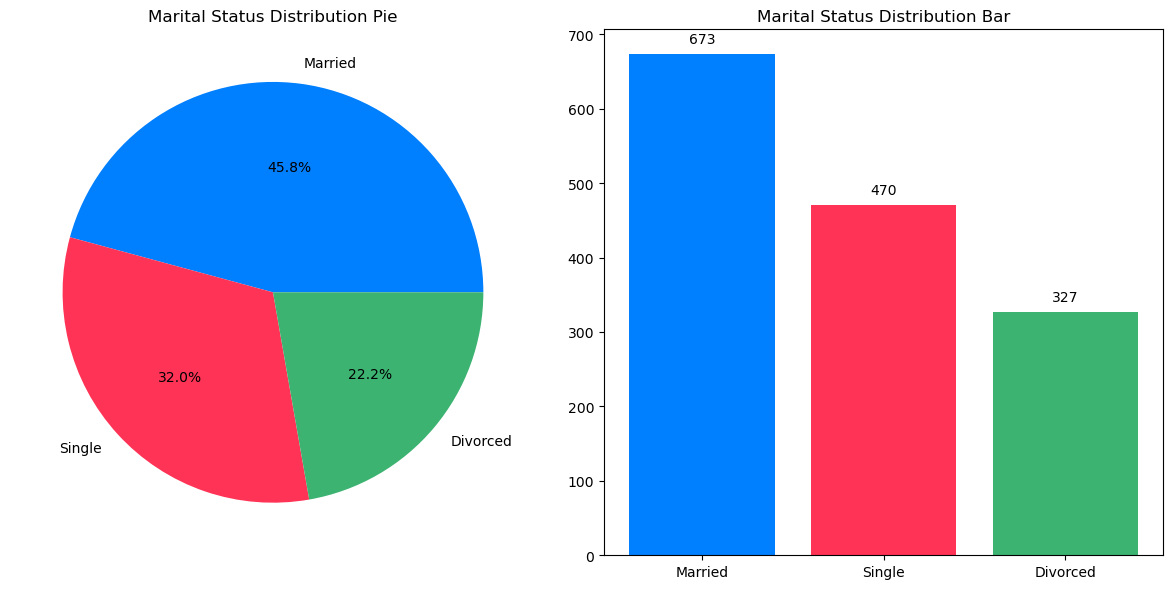

In [167]:
marital_status_counts = df['MaritalStatus'].value_counts()
labels = ['Married', 'Single', 'Divorced']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(marital_status_counts, labels=labels, autopct='%1.1f%%', colors=colors_triple)
axs[0].set_title('Marital Status Distribution Pie')

axs[1].bar(labels, marital_status_counts, label=labels, color=colors_triple)
axs[1].set_title('Marital Status Distribution Bar')
for i, count in enumerate(marital_status_counts):
    axs[1].text(i, count + 15, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

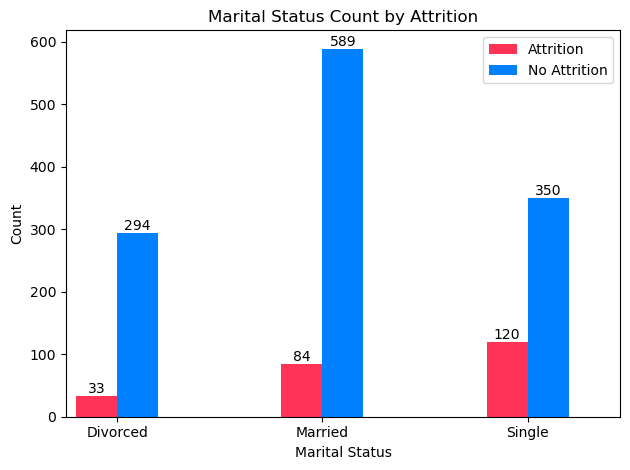

In [48]:
marital_status_counts = df.groupby(['MaritalStatus', 'Attrition']).size().unstack(fill_value=0)

bar_width = 0.2
index = np.arange(len(marital_status_counts))

marital_status_counts[1].plot(kind='bar', width=bar_width, position=1, color='#FF3356', label='Attrition', align='center')
marital_status_counts[0].plot(kind='bar', width=bar_width, position=0, color='#007FFF', label='No Attrition', align='center')

plt.title('Marital Status Count by Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend()
plt.xticks(index, marital_status_counts.index, rotation=0)  

for i, (attrition_yes, attrition_no) in enumerate(zip(marital_status_counts[1], marital_status_counts[0])):
    plt.text(i - bar_width/2, attrition_yes + 5, str(attrition_yes), ha='center', fontsize=10)
    plt.text(i + bar_width/2, attrition_no + 5, str(attrition_no), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

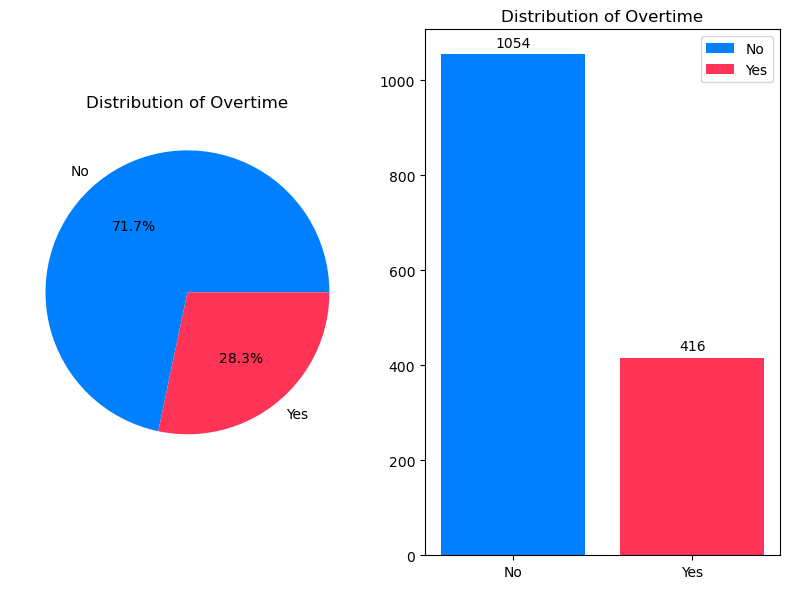

In [169]:
overtime_counts = df['OverTime'].value_counts()
labels = ['No', 'Yes']

fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].pie(overtime_counts, labels=labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Distribution of Overtime')

axs[1].bar(labels, overtime_counts, label=labels, color=colors)
axs[1].set_title('Distribution of Overtime')
for i, count in enumerate(overtime_counts):
    axs[1].text(i, count + 15, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.legend()

plt.show()

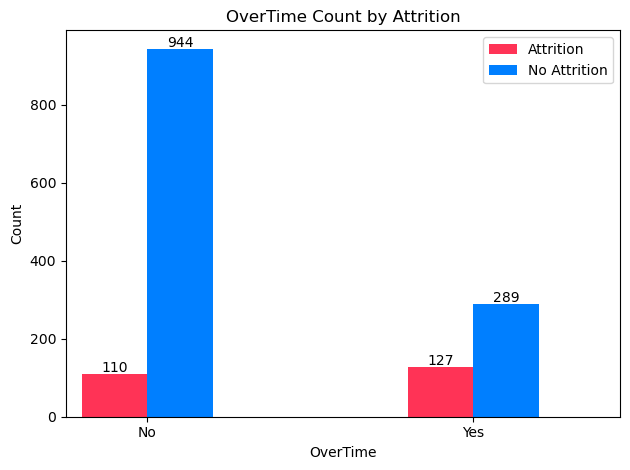

In [52]:
overtime_counts = df.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)
bar_width = 0.2
labels = ['No', 'Yes']
index = np.arange(len(overtime_counts))

overtime_counts[1].plot(kind='bar', width=bar_width, position=1, color='#FF3356', label='Attrition', align='center')
overtime_counts[0].plot(kind='bar', width=bar_width, position=0, color='#007FFF', label='No Attrition', align='center')

plt.title('OverTime Count by Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)

for i, (attrition_yes, attrition_no) in enumerate(zip(overtime_counts[1], overtime_counts[0])):
    plt.text(i - bar_width/2, attrition_yes + 5, str(attrition_yes), ha='center', fontsize=10)
    plt.text(i + bar_width/2, attrition_no + 5, str(attrition_no), ha='center', fontsize=10)

plt.tight_layout()
plt.legend()

plt.show()

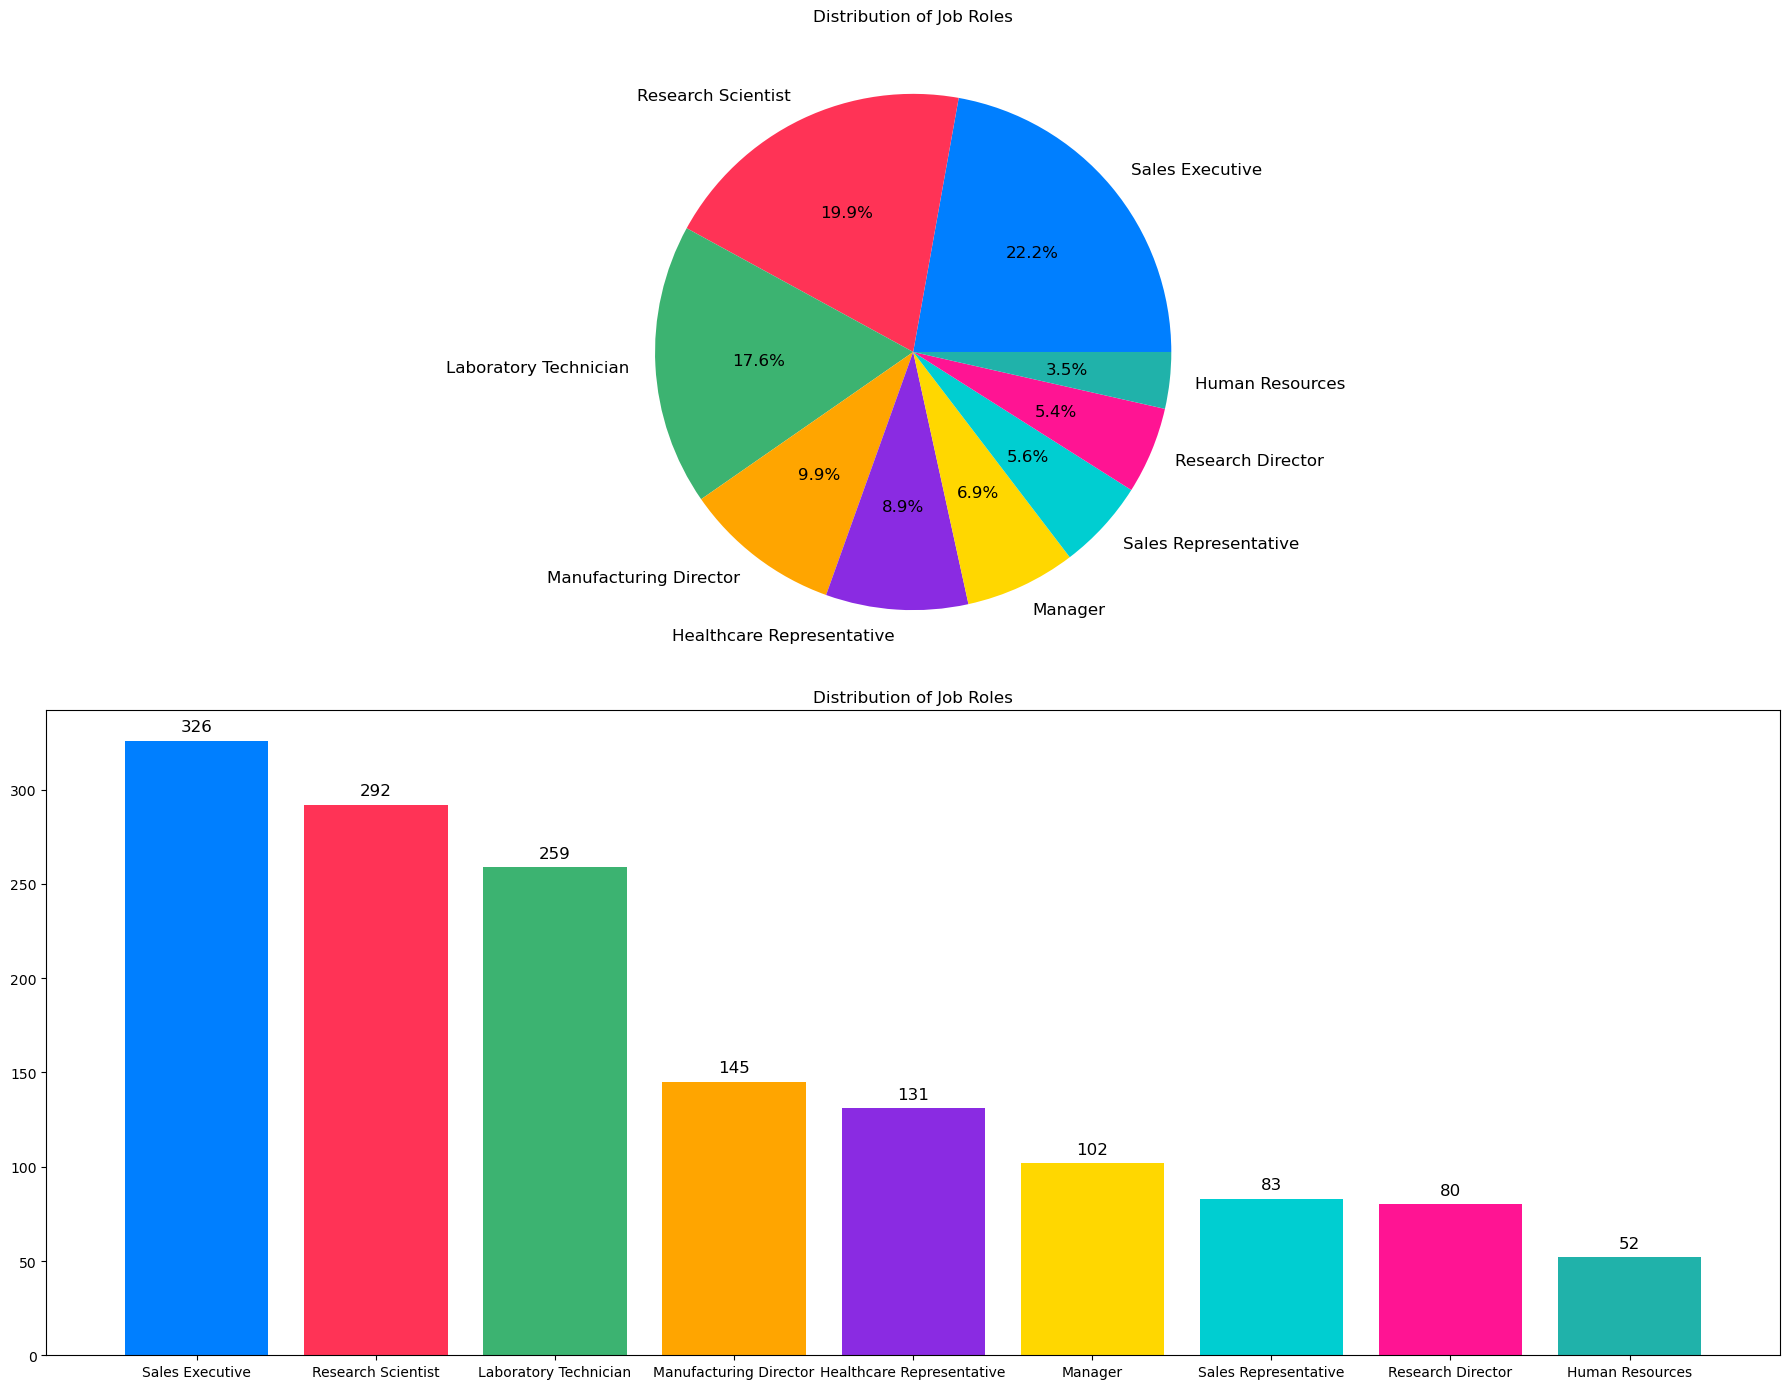

In [159]:
jobrole_counts = df['JobRole'].value_counts()
labels = ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 
          'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
colors_multiple = ['#007FFF', '#FF3356', '#3CB371', '#FFA500', '#8A2BE2', '#FFD700', '#00CED1', '#FF1493', '#20B2AA']

fig, axs = plt.subplots(2, 1, figsize=(18, 14))

axs[0].pie(jobrole_counts, labels=labels, autopct='%1.1f%%', colors=colors_multiple, textprops={'fontsize': 12})
axs[0].set_title('Distribution of Job Roles')

axs[1].bar(labels, jobrole_counts, label=labels, color=colors_multiple)
axs[1].set_title('Distribution of Job Roles')
for i, count in enumerate(jobrole_counts):
    axs[1].text(i, count + 5, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

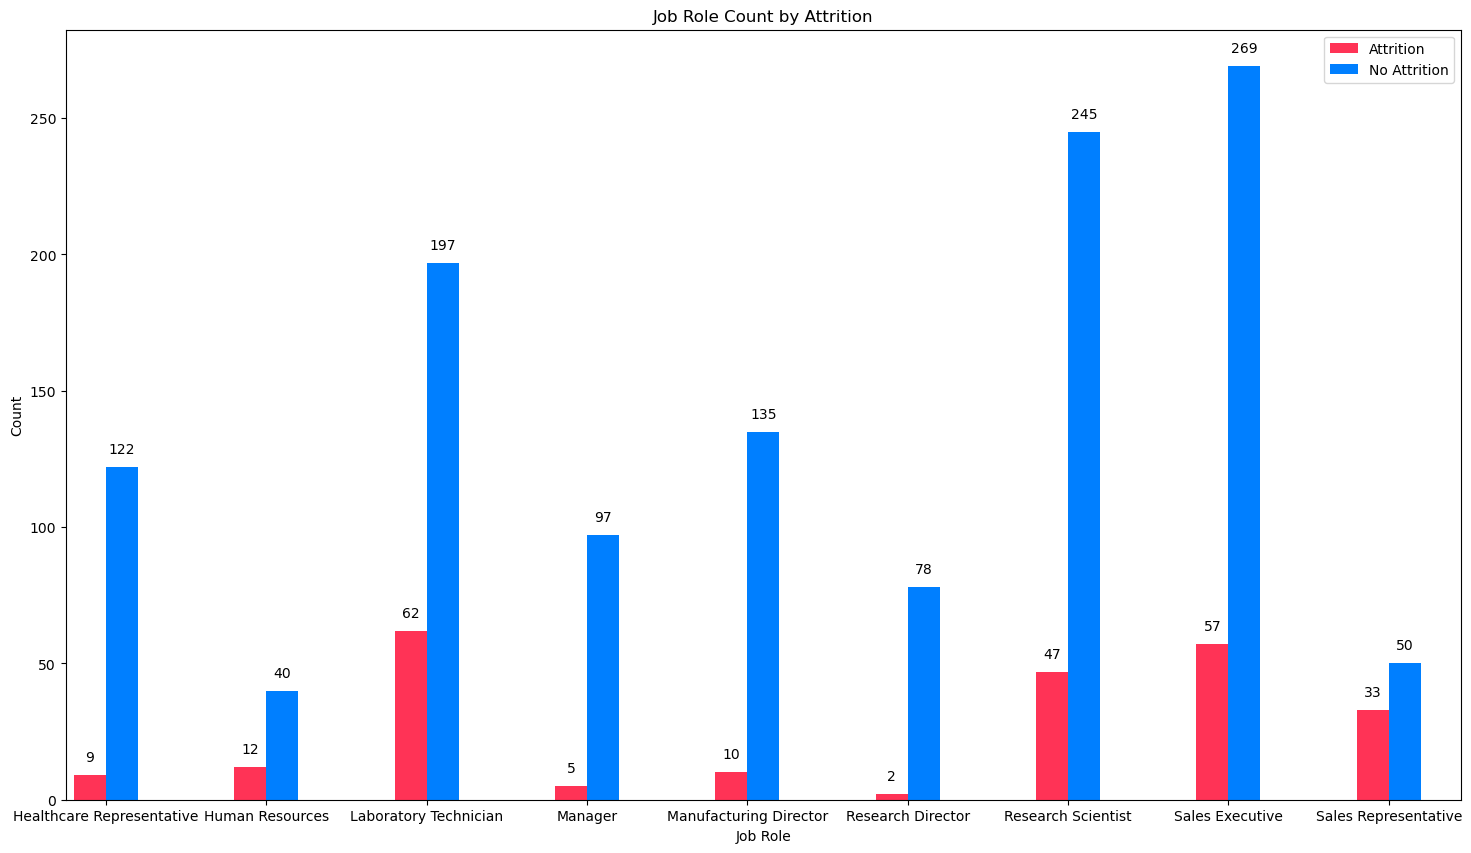

In [55]:
jobrole_counts = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

bar_width = 0.2
index = np.arange(len(jobrole_counts))
plt.figure(figsize=(18, 10))

# Plot the bars for each attrition status
jobrole_counts[1].plot(kind='bar', width=bar_width, position=1, color='#FF3356', label='Attrition', align='center')
jobrole_counts[0].plot(kind='bar', width=bar_width, position=0, color='#007FFF', label='No Attrition', align='center')

# Customize the chart
plt.title('Job Role Count by Attrition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(index, jobrole_counts.index, rotation=0)  
plt.legend()

# Add count labels on top of the bars
for i, (attrition_yes, attrition_no) in enumerate(zip(jobrole_counts[1], jobrole_counts[0])):
    plt.text(i - bar_width/2, attrition_yes + 5, str(attrition_yes), ha='center', fontsize=10)
    plt.text(i + bar_width/2, attrition_no + 5, str(attrition_no), ha='center', fontsize=10)

plt.show()

### Distribution of Variables

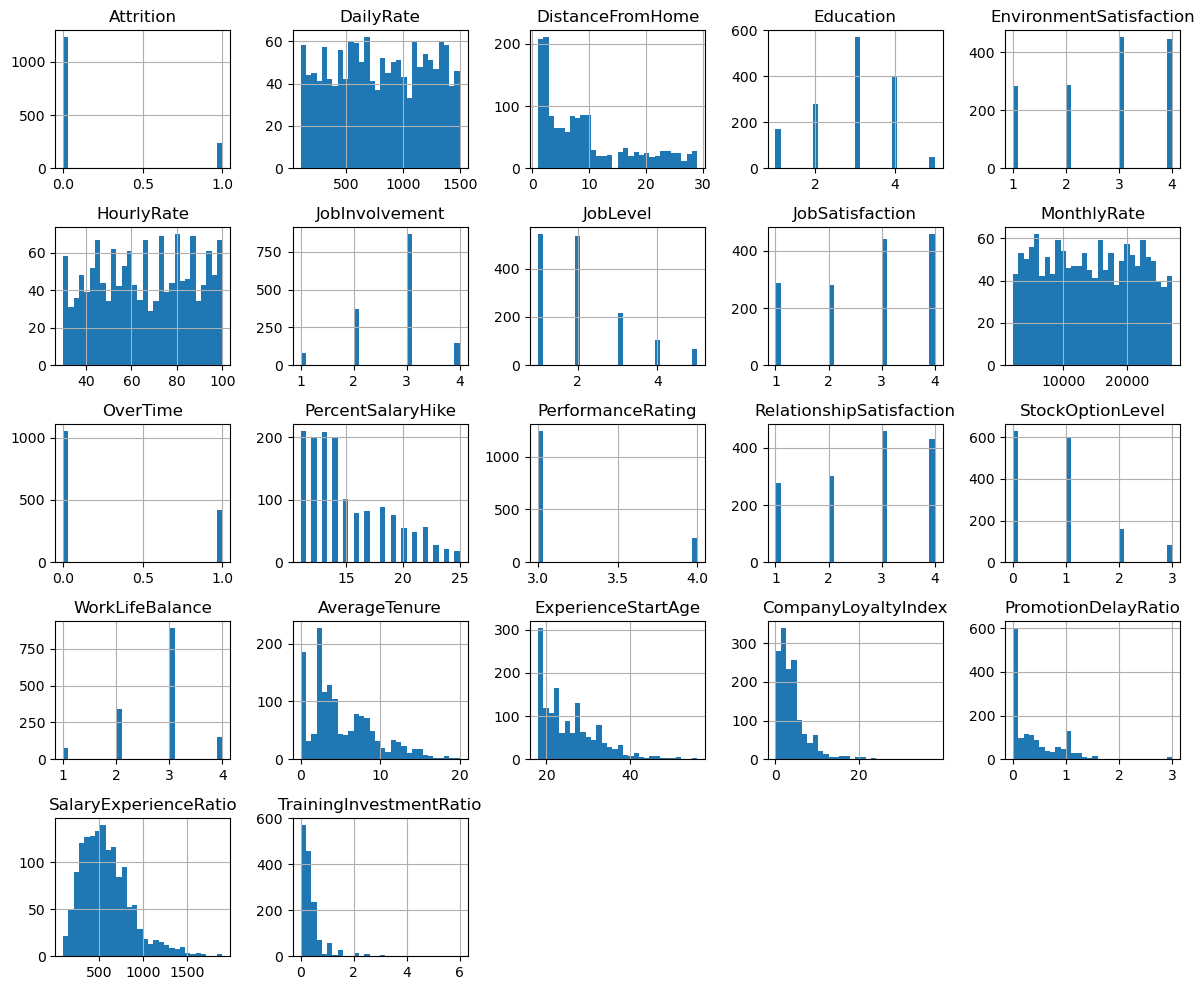

In [58]:
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

In [60]:
numerical_cols = df.select_dtypes(include=['number']).columns
normality_results = {}

for col in numerical_cols:
    stat, p = shapiro(df[col].dropna())
    
    normality_results[col] = {
        "p-value": p,
        "Normal?": "Yes" if p > 0.05 else "No"
    }

normality_df = pd.DataFrame.from_dict(normality_results, orient="index")

display(normality_df)

,p-value,Normal?
Attrition,2.407966e-55,No
DailyRate,5.329330e-21,No
DistanceFromHome,4.080847e-34,No
Education,1.725712e-30,No
EnvironmentSatisfaction,2.737888e-35,No
HourlyRate,7.418846e-21,No
JobInvolvement,1.613598e-38,No
JobLevel,1.499355e-37,No
JobSatisfaction,1.373434e-35,No
MonthlyRate,5.516502e-21,No


### Correlation Analysis

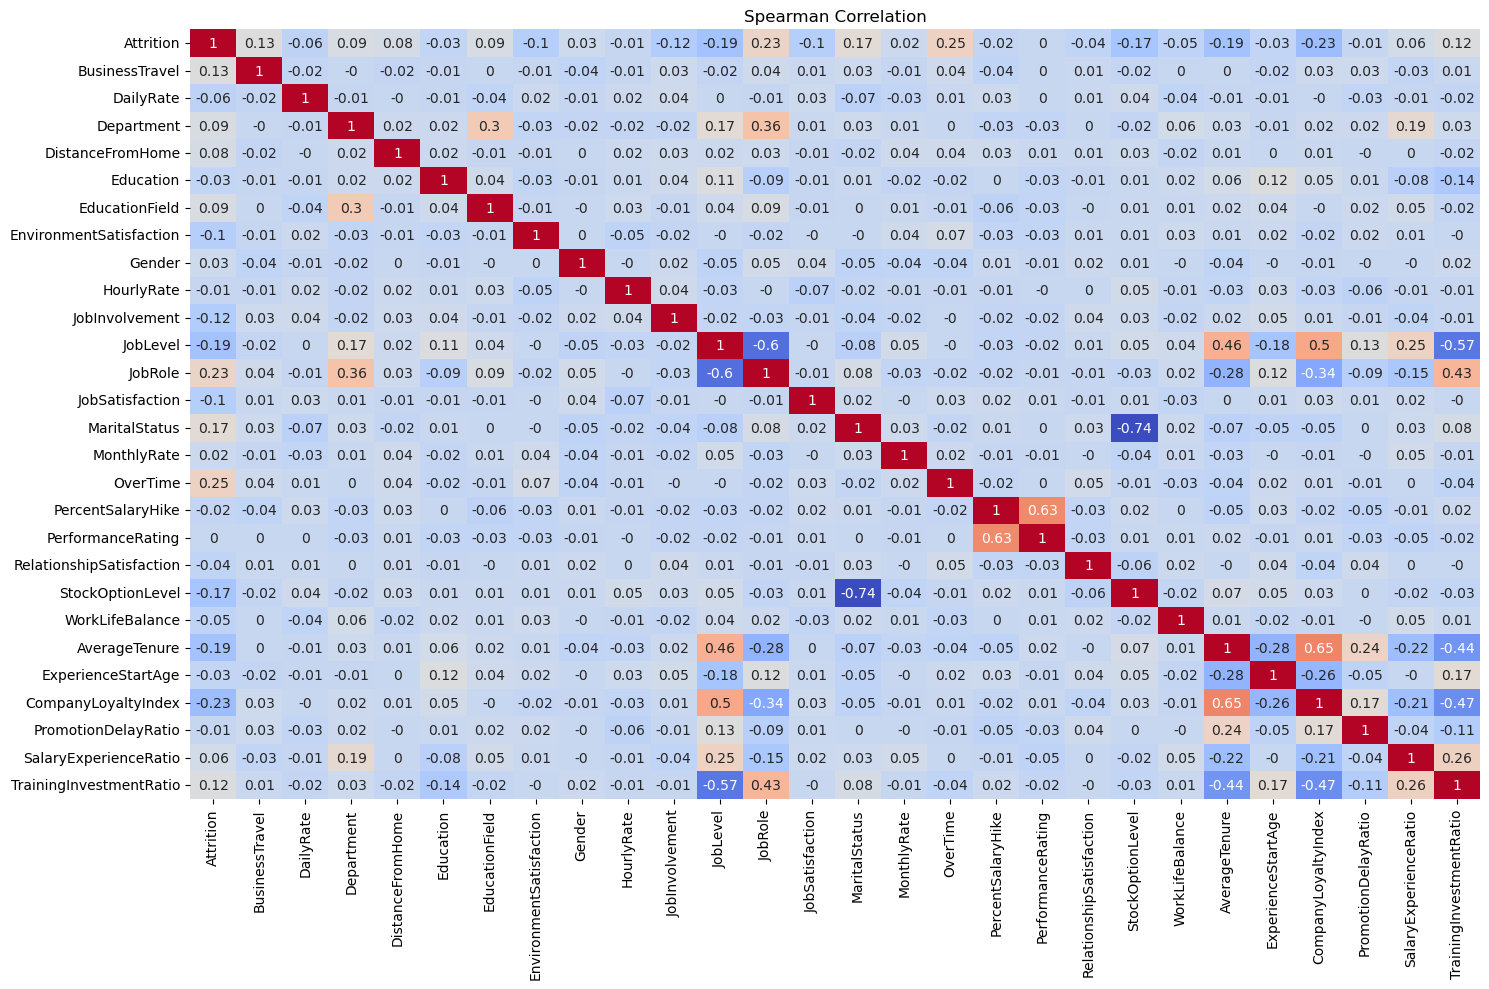

In [115]:
df_corr = df_label_encoding.corr(method="spearman")
plt.figure(figsize=(15, 10))
plt.title("Spearman Correlation")
sns.heatmap(round(df_corr, 2), annot=True, cmap="coolwarm", cbar=False)
plt.tight_layout()
plt.show()

#### Creating a heatmap with only moderate correlations (positive or negative)

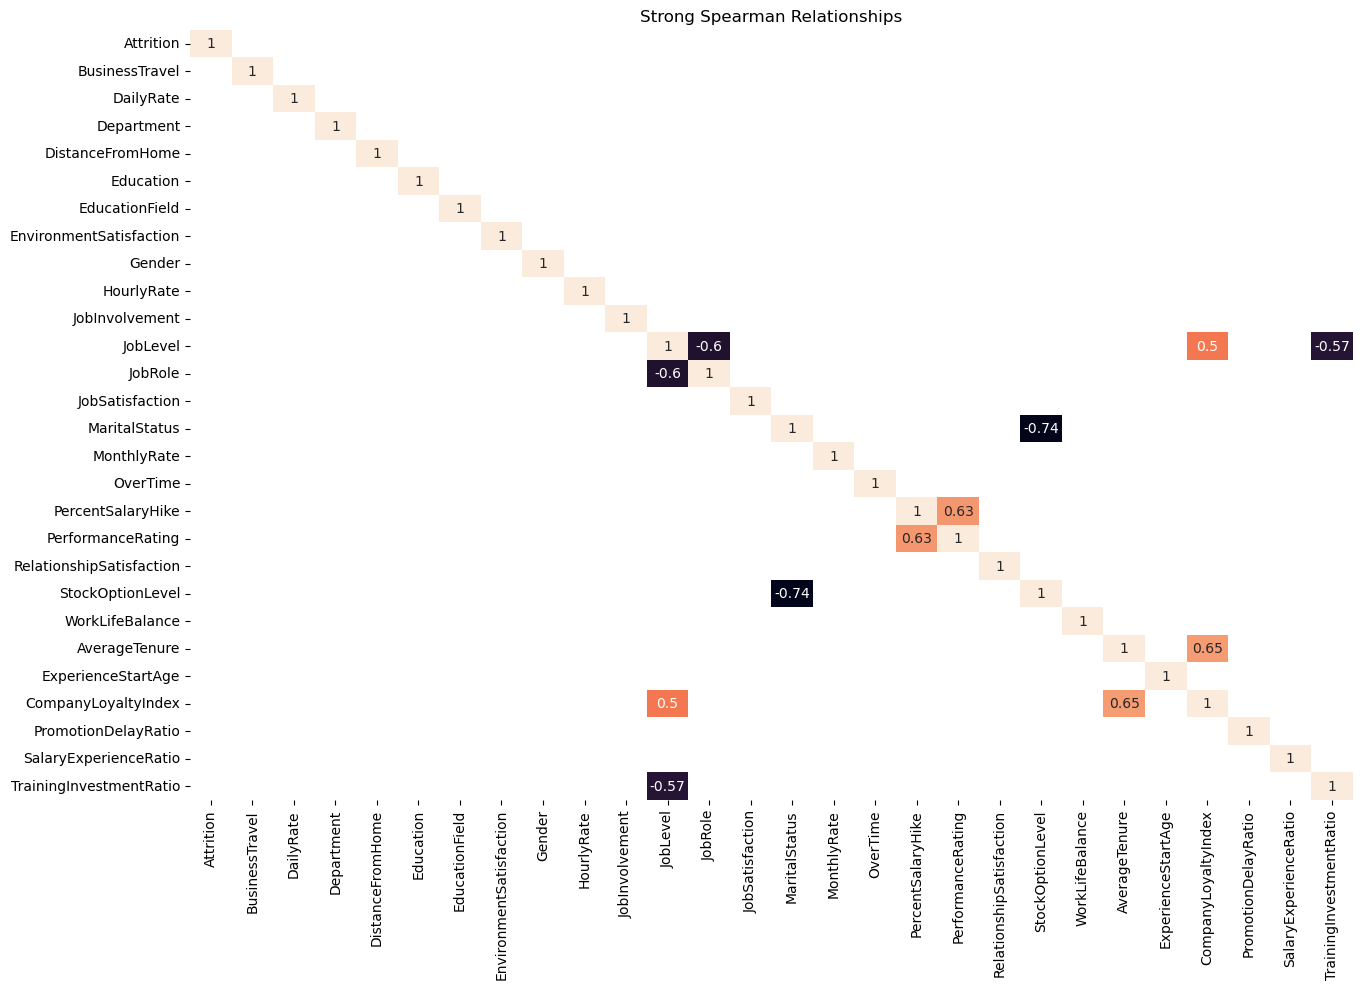

In [119]:
plt.figure(figsize=(15, 10))
plt.title("Strong Spearman Relationships")
sns.heatmap(df_corr[(df_corr >= 0.5) | (df_corr <= -0.5)], annot=True, cbar=False)

plt.show()

#### Spearman Correlation of all the variables against Attrition

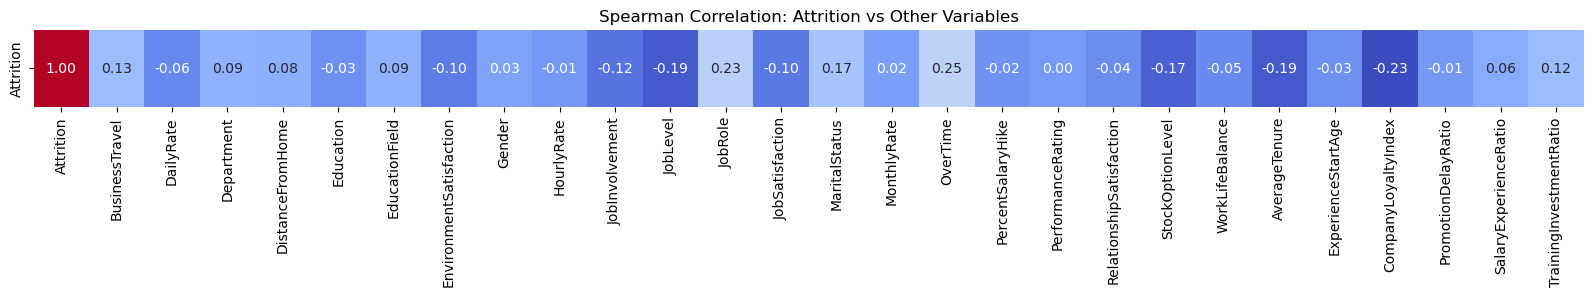

In [125]:
attrition_corr = df_corr.loc[['Attrition'], :]

plt.figure(figsize=(20, 1))
sns.heatmap(attrition_corr, annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title("Spearman Correlation: Attrition vs Other Variables")

plt.show()

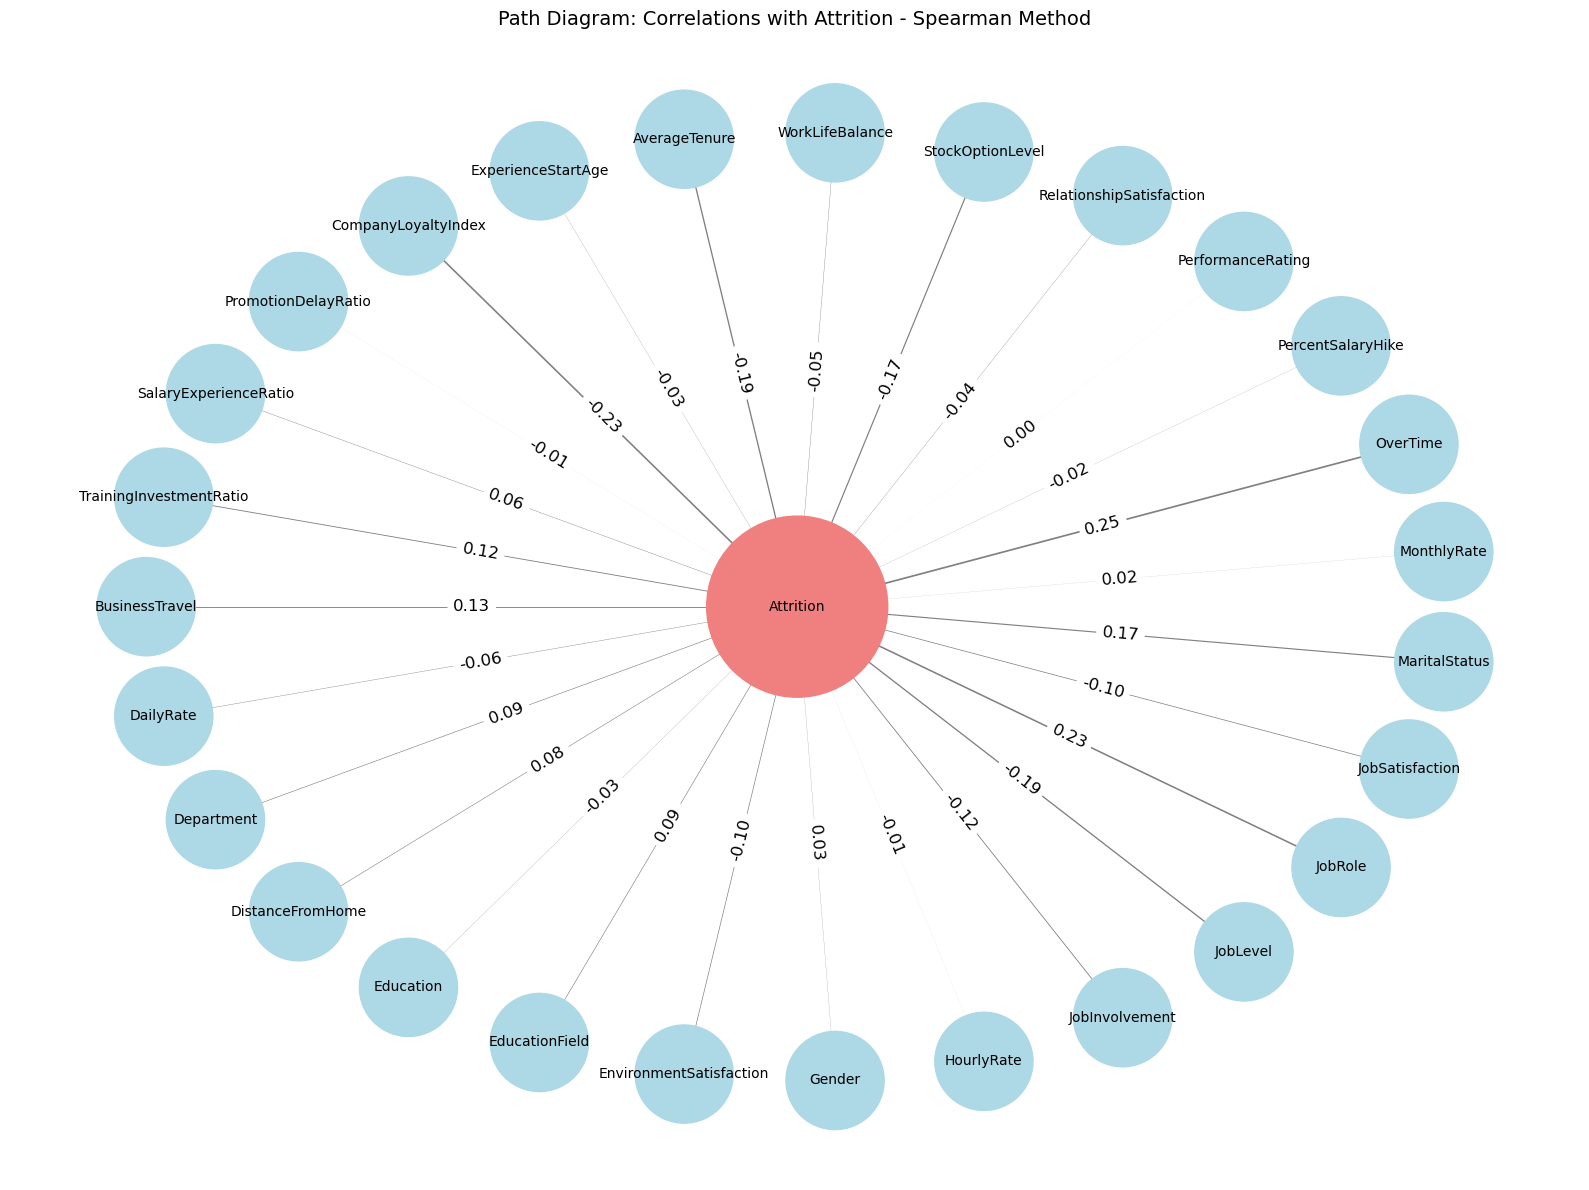

In [134]:
focus_variable = 'Attrition'
G = nx.Graph()

# Add edges for variables with strong correlations
for col in df_corr.columns:
    if col != focus_variable:
        # Add an edge with correlation value as the weight
        G.add_edge(focus_variable, col, weight=df_corr.loc[focus_variable, col])

shell_pos = [[focus_variable], [node for node in G.nodes if node != focus_variable]]
pos = nx.shell_layout(G, nlist=shell_pos)

node_sizes = [17000 if node == focus_variable else 5000 for node in G.nodes()]
node_colors = ['lightcoral' if node == focus_variable else 'lightblue' for node in G.nodes()]

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
edges = G.edges(data=True)
weights = [abs(edge[2]['weight']) * 5 for edge in edges]  
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
edge_labels = {(edge[0], edge[1]): f"{edge[2]['weight']:.2f}" for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Path Diagram: Correlations with Attrition - Spearman Method", fontsize=14)
plt.axis("off")  
plt.tight_layout() 

plt.show()

#### Creating a new dataframe, keeping only columns that correlate with Attrition by |0.15|

In [137]:
cols_to_keep = attrition_corr.loc["Attrition"].abs() >= 0.15  
cols_to_keep = cols_to_keep[cols_to_keep].index.tolist()  

df_filtered = df_label_encoding[cols_to_keep]

print(f"Kept columns: {cols_to_keep}")
df_filtered.head()

Kept columns: ['Attrition', 'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime', 'StockOptionLevel', 'AverageTenure', 'CompanyLoyaltyIndex']


,Attrition,JobLevel,JobRole,MaritalStatus,OverTime,StockOptionLevel,AverageTenure,CompanyLoyaltyIndex
0,1,2,0.174805,2,1,0,5.0,0.888889
1,0,2,0.160960,1,0,1,8.0,5.000000
2,1,1,0.239082,2,1,0,0.0,1.000000
3,0,1,0.160960,1,1,0,5.0,4.000000
4,0,1,0.239082,1,0,1,2.0,0.600000


### Women In Labour Force - Hypothesis Testing

We need to test whether there's a statistically significant difference in attrition rates between men and women.

We use a Chi-Square test since attrition is a binary variable (0/1).

- Null Hypothesis (H₀): The proportion of attrition is the same for men and women.
- Alternative Hypothesis (H₁): The proportion of attrition is different for women compared to men.

In [140]:
male_attrition = df_label_encoding[df_label_encoding['Gender'] == 0]['Attrition']
female_attrition = df_label_encoding[df_label_encoding['Gender'] == 1]['Attrition']

male_count = len(male_attrition)
female_count = len(female_attrition)
male_attrition_sum = male_attrition.sum()
female_attrition_sum = female_attrition.sum()

print(f"Total Males: {male_count}, Attrition Cases: {male_attrition_sum}")
print(f"Total Females: {female_count}, Attrition Cases: {female_attrition_sum}")

contingency_table = pd.crosstab(df_label_encoding['Gender'], df_label_encoding['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}\n")

if p < 0.05:
    print("Statistically significant difference in attrition rates between genders (Reject H₀)")
else:
    print("No statistically significant difference in attrition rates between genders (Fail to reject H₀)")


Total Males: 588, Attrition Cases: 87
Total Females: 882, Attrition Cases: 150
Chi-Square Statistic: 1.1170, p-value: 0.2906

No statistically significant difference in attrition rates between genders (Fail to reject H₀)


Our Chi-Square test found **no statistically significant** difference in attrition rates between men and women. This means that gender does not appear to be a determining factor in voluntary attrition, suggesting that other factors may play a bigger role in employee turnover. 

### Stock Option Level - Hypothesis Testing

Does Stock Option level significantly influence attrition?
The paper and our measurement model suggests contradictory effects (both positive & negative), so we need to check for any significant effect.

**Positive effects:** Employee's commitment to the company. As the stock increases their earnings increase.

**Negative effects:** The earnings from Stock Options may be sufficient for the livelihood of the employee or it may sometimes exceed his income leading to his disinterest to continue the job.

In this case, the StockOptionLevel variable is ordinal (0,1,2,3) and the Attrition variable is binary (0/1). We need to test whether StockOptionLevel has a statistically significant effect on Attrition. We will perform:
- Chi-Square test to check if StockOptionLevel & Attrition are related
    - Null Hypothesis (H₀): StockOptionLevel has no significant relationship with attrition.
    - Alternative Hypothesis (H₁): StockOptionLevel has a significant relationship with attrition.
- Kruskal-Wallis test (non-parametric ANOVA) to check if attrition rates vary across levels	
    - Null Hypothesis (H₀): StockOptionLevel has no significant effect on attrition.
    - Alternative Hypothesis (H₁): StockOptionLevel significantly affects attrition.

In [74]:
contingency_table = pd.crosstab(df_label_encoding['StockOptionLevel'], df_label_encoding['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square \nStatistic: {chi2:.4f}, p-value: {p:.16f}")

if p < 0.05:
    print("Statistically significant relationship between StockOptionLevel and Attrition (Reject H₀)\n")
else:
    print("No statistically significant relationship (Fail to reject H₀)\n")

groups = [df_label_encoding[df_label_encoding["StockOptionLevel"] == level]["Attrition"] 
          for level in sorted(df_label_encoding["StockOptionLevel"].unique())]


h_stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis \nH-Statistic: {h_stat:.4f}, p-value: {p_value:.16f}")

if p_value < 0.05:
    print("StockOptionLevel has a significant effect on Attrition (Reject H₀)")
else:
    print("No significant effect of StockOptionLevel on Attrition (Fail to reject H₀)")

Chi-Square 
Statistic: 60.5983, p-value: 0.0000000000004379
Statistically significant relationship between StockOptionLevel and Attrition (Reject H₀)

Kruskal-Wallis 
H-Statistic: 60.5571, p-value: 0.0000000000004469
StockOptionLevel has a significant effect on Attrition (Reject H₀)


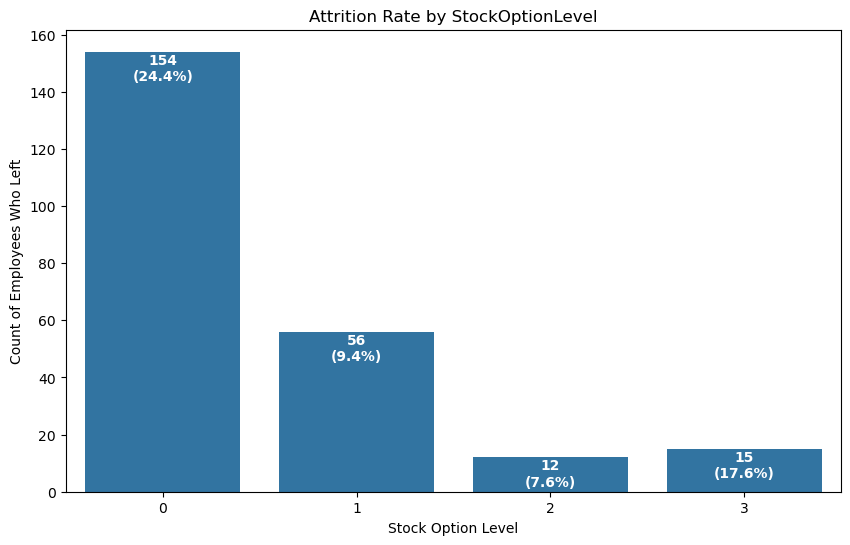

In [75]:
stock_option_level_counts = df_label_encoding.groupby(['StockOptionLevel', 'Attrition']).size().unstack(fill_value=0)
yes_attrition_counts = stock_option_level_counts[1]  

total_counts = stock_option_level_counts.sum(axis=1)  
yes_attrition_percentage = (yes_attrition_counts / total_counts) * 100 

plt.figure(figsize=(10,6))
ax = sns.barplot(x=yes_attrition_counts.index, y=yes_attrition_counts.values)

for i, value in enumerate(yes_attrition_counts):
    plt.text(i, value - 10, f"{value}\n({yes_attrition_percentage.iloc[i]:.1f}%)", ha="center", fontsize=10, color="white", weight='bold')

plt.title("Attrition Rate by StockOptionLevel")
plt.xlabel("Stock Option Level")
plt.ylabel("Count of Employees Who Left")

plt.show()

Our analysis confirms a non-linear relationship between StockOptionLevel and attrition, aligning with our initial assumptions.
- Employees with no stock options (Level 0) had the highest attrition, suggesting that stock options may serve as an incentive for retention.
- Attrition rates decrease as stock options increase, with Level 2 having the lowest attrition, indicating an optimal balance where employees feel committed but still motivated to work.
- At Level 3 (highest stock options), attrition slightly increases again, possibly because high stock earnings provide financial security, making employees more likely to leave voluntarily.

## Classification Modelling 

In [78]:
os.environ["LOKY_MAX_CPU_COUNT"] = "12"
data = df_filtered.copy()

# Separate features and target
target_column = 'Attrition'
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the dataset into training and holdout test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Defining custom scoring metrics

In [144]:
precision_scorer = make_scorer(precision_score, pos_label=1)
recall_scorer = make_scorer(recall_score, pos_label=1)
f1_scorer = make_scorer(f1_score, pos_label=1)

#### Helper function to evaluate models using cross-validation

In [82]:
def evaluate_models(models, X_train, y_train):
    model_results = {}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, model in models.items():
        print(f"Cross-validating {model_name}...")
        
        steps = [
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('model', model)]


        pipeline = Pipeline(steps=steps)
        
        scoring_metrics = {'accuracy': 'accuracy', 'precision': precision_scorer, 'recall': recall_scorer, 'f1': f1_scorer}
        scores = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring_metrics)

        model_results[model_name] = {
            "Accuracy": round(scores['test_accuracy'].mean(), 2),
            "Precision (Class 1)": round(scores['test_precision'].mean(), 2),
            "Recall (Class 1)": round(scores['test_recall'].mean(), 2),
            "F1-Score (Class 1)": round(scores['test_f1'].mean(), 2)
        }
    return pd.DataFrame(model_results).T.reset_index()

#### Define models without weights

In [85]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42,solver="saga", tol=1e-4, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting (sklearn)": GradientBoostingClassifier(random_state=42,),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42, tol=1e-3, max_iter=10000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5, n_jobs=-1,),
    "lightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42, early_stopping=True),

}

#### Evaluate models using cross-validation on the training set

In [92]:
print("Evaluating models on the training set using cross-validation...")
results_df = evaluate_models(models, X_train, y_train)
results_df = pd.DataFrame(results_df).T.reset_index()

Evaluating models on the training set using cross-validation...
Cross-validating Logistic Regression...
Cross-validating Random Forest...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Cross-validating Gradient Boosting (sklearn)...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Cross-validating Support Vector Machine (SVM)...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Cross-validating K-Nearest Neighbors (KNN)...
Cross-validating lightGBM...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Cross-validating Neural Network (MLP)...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

#### Visualize the holdout results

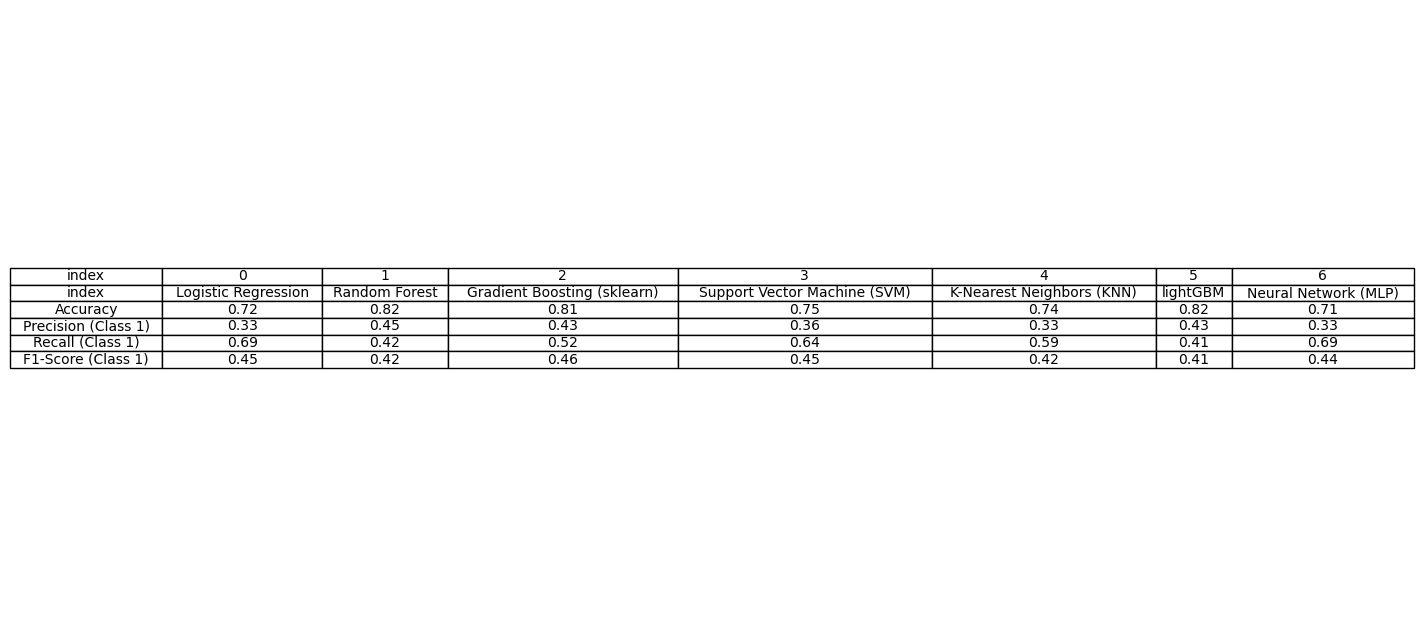

In [94]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

plt.show()

#### Hyperparameter grids for tuning

In [97]:
param_grids = {
    "Logistic Regression": {
        'model__penalty': ['l2'],
        'model__C': [0.0001],
        'model__solver': ['liblinear'],
        'model__class_weight': [None]
        # 'model__penalty': ['l1', 'l2'],
        # 'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        # 'model__solver': ['liblinear', 'saga'],
        # 'model__class_weight': [None, 'balanced']
    },
    "Random Forest": {
        'model__n_estimators': [100],
        'model__max_depth': [5],
        'model__min_samples_split': [10],
        'model__min_samples_leaf': [2],
        'model__class_weight': [None]
        # 'model__n_estimators': [100, 300, 500, 1000],
        # 'model__max_depth': [None, 5, 10, 20, 30],
        # 'model__min_samples_split': [2, 5, 10],
        # 'model__min_samples_leaf': [1, 2, 4],
        # 'model__class_weight': [None, 'balanced']
    },
    "Gradient Boosting (sklearn)": {
        'model__learning_rate': [0.001],
        'model__n_estimators': [100],
        'model__max_depth': [3]
        # 'model__learning_rate': [0.001, 0.01, 0.1, 0.2],
        # 'model__n_estimators': [100, 200, 300, 500],
        # 'model__subsample': [0.6, 0.8, 1.0],
        # 'model__max_depth': [3, 5, 7, 9],
        # 'model__min_samples_split': [2, 5, 10],
        # 'model__min_samples_leaf': [1, 2, 5],
        # 'model__max_features': [None, 'sqrt', 'log2']
    },
    "Neural Network (MLP)": {
        'model__hidden_layer_sizes': [(50,), (100,), (150,), (200,), (100, 50)],
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam', 'sgd'],
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__learning_rate_init': [0.0001, 0.001, 0.01]
    },
    "Support Vector Machine (SVM)": {
        'model__kernel': ['rbf'],
        'model__C': [0.01],
        'model__gamma': [0.001],
        'model__class_weight': [None]
        # 'model__kernel': ['linear', 'rbf'],
        # 'model__C': [0.01, 0.1, 1, 10, 100],
        # 'model__gamma': [0.001, 0.01, 0.1, 1],
        # 'model__class_weight': [None, 'balanced']
    },
    "K-Nearest Neighbors (KNN)": {
        'model__n_neighbors': [15],
        'model__weights': ['uniform'],
        'model__metric': ['chebyshev']
        # 'model__n_neighbors': [3, 5, 7, 9, 11, 15],
        # 'model__weights': ['uniform', 'distance'],
        # 'model__metric': ['euclidean', 'manhattan', 'chebyshev']
    },
    "lightGBM": {
        'model__n_estimators': [100],
        'model__learning_rate': [0.01],
    }
}

#### Perform GridSearchCV for model tuning

In [99]:
best_models = {}
for model_name, model in models.items():
    if model_name not in param_grids:
        print(f"No parameter grid for {model_name}. Skipping...")
        continue

    print(f"Tuning {model_name}...")
    
    # Create a pipeline with SMOTE    
    steps = [
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('model', model)]
    

    smote_pipeline = Pipeline(steps=steps)

    grid_search = GridSearchCV(smote_pipeline, 
                               param_grids[model_name], 
                               cv=5, 
                               scoring={
                                'Recall': make_scorer(recall_score, pos_label=1),
                                'F1': make_scorer(f1_score, pos_label=1)
                                },
                                refit='Recall', n_jobs=-1
                                )
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Tuning Logistic Regression...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Best parameters for Logistic Regression: {'model__C': 0.0001, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Tuning Random Forest...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best parameters for Random Forest: {'model__class_weight': None, 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Tuning Gradient Boosting (sklearn)...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Best parameters for Gradient Boosting (sklearn): {'model__learning_rate': 0.001, 'model__max_depth': 3, 'model__n_estimators': 100}
Tuning Support Vector Machine (SVM)...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Best parameters for Support Vector Machine (SVM): {'model__C': 0.01, 'model__class_weight': None, 'model__gamma': 0.001, 'model__kernel': 'rbf'}
Tuning K-Nearest Neighbors (KNN)...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Best parameters for K-Nearest Neighbors (KNN): {'model__metric': 'chebyshev', 'model__n_neighbors': 15, 'model__weights': 'uniform'}
Tuning lightGBM...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Best parameters for lightGBM: {'model__learning_rate': 0.01, 'model__n_estimators': 100}
Tuning Neural Network (MLP)...


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages

Best parameters for Neural Network (MLP): {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100, 50), 'model__learning_rate_init': 0.0001, 'model__solver': 'sgd'}


#### Save tuned models' results

In [100]:
print("Evaluating tuned models on the holdout test set...")
holdout_results = {}
for model_name, model in best_models.items():
    print(f"Testing {model_name} on holdout set...")
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    accuracy = model.score(X_test, y_test)

    holdout_results[model_name] = {
        "Accuracy": round(accuracy, 2),
        "Precision (Class 1)": round(precision, 2),
        "Recall (Class 1)": round(recall, 2),
        "F1-Score (Class 1)": round(f1, 2)
    }

    print(f"Classification report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

Evaluating tuned models on the holdout test set...
Testing Logistic Regression on holdout set...
Classification report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      0.49      0.64       247
           1       0.24      0.83      0.37        47

    accuracy                           0.54       294
   macro avg       0.59      0.66      0.51       294
weighted avg       0.83      0.54      0.60       294

Testing Random Forest on holdout set...
Classification report for Random Forest:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.37      0.64      0.47        47

    accuracy                           0.77       294
   macro avg       0.64      0.71      0.66       294
weighted avg       0.83      0.77      0.79       294

Testing Gradient Boosting (sklearn) on holdout set...
Classification report for Gradient Boosting (sklearn):

         

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#### Save holdout results to a dataframe

In [156]:
holdout_results_df = pd.DataFrame(holdout_results).T.reset_index()

#### Visualize the holdout results

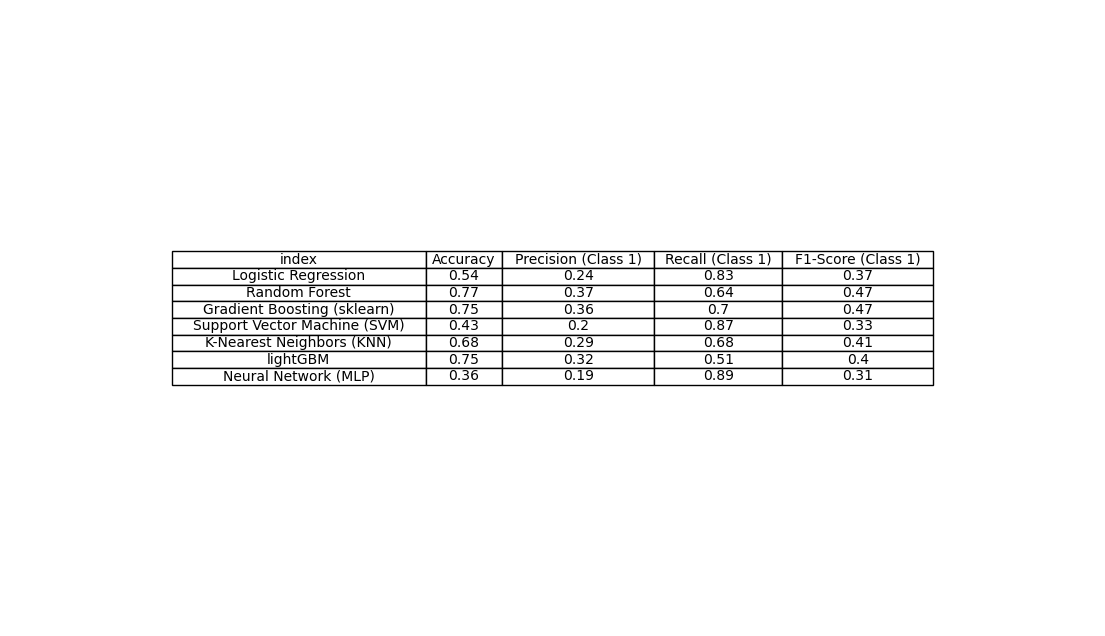

In [107]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=holdout_results_df.values, colLabels=holdout_results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(holdout_results_df.columns))))

plt.show()

### Classification Summary  
The classification task aimed to predict employee attrition using various machine learning models and make a choice. Recall was prioritized to be make sure that attrition is predicted as accurate as possible.
Key findings from the evaluation are as follows:

---


#### **Top Performers**  
- **Random Forest** achieved the highest **accuracy (77%)** and **F1-Score (0.47)** for Class 1 (attrition), balancing precision (37%) and recall (64%).  
- **Gradient Boosting** matched Random Forest’s F1-Score (0.47) with slightly higher recall (70%) but lower precision (36%).

#### **Key Observations** 
- **Imbalance Handling**: SMOTE and stratified sampling were used, but precision remained low across models, indicating persistent class imbalance challenges.  
- **Model Suitability**:  
  - For detecting most attrition cases (high recall), Logistic Regression or SVM might be preferred but we also notice very low accuracy on this models.  
  - For balanced performance, Random Forest or Gradient Boosting are optimal.  
- **Areas for Improvement**:  
  - Feature engineering to better capture attrition drivers.  
  - Better and more inclusive hypertuning to find the optimal parameters for each model.  

#### **Holdout Test Results**  
| Model                          | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |  
|--------------------------------|----------|---------------------|------------------|--------------------|  
| Logistic Regression            | 0.54     | 0.24                | 0.83             | 0.37               |  
| Random Forest                  | 0.77     | 0.37                | 0.64             | 0.47               |  
| Gradient Boosting (sklearn)    | 0.75     | 0.36                | 0.70             | 0.47               |  
| Support Vector Machine (SVM)   | 0.43     | 0.20                | 0.87             | 0.33               |  
